In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
titanic = pd.read_csv("titanic.csv")
titanic.head()
cat = ["Name" , "PassengerId" , "Ticket"]
titanic.drop(cat  , axis = 1 , inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [9]:
titanic.groupby("Survived").mean()
# titanic.groupby("Survived").median()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [10]:
titanic.groupby(titanic["Age"].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


<Figure size 640x480 with 0 Axes>

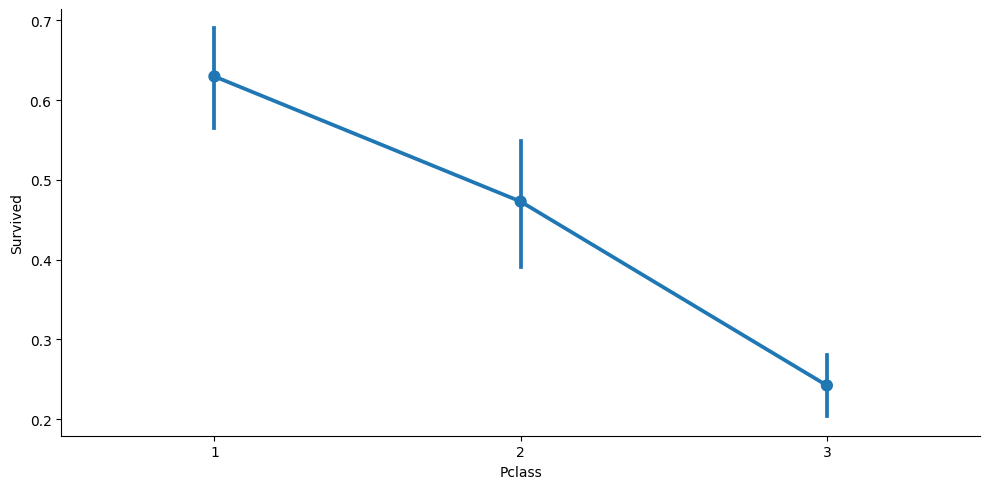

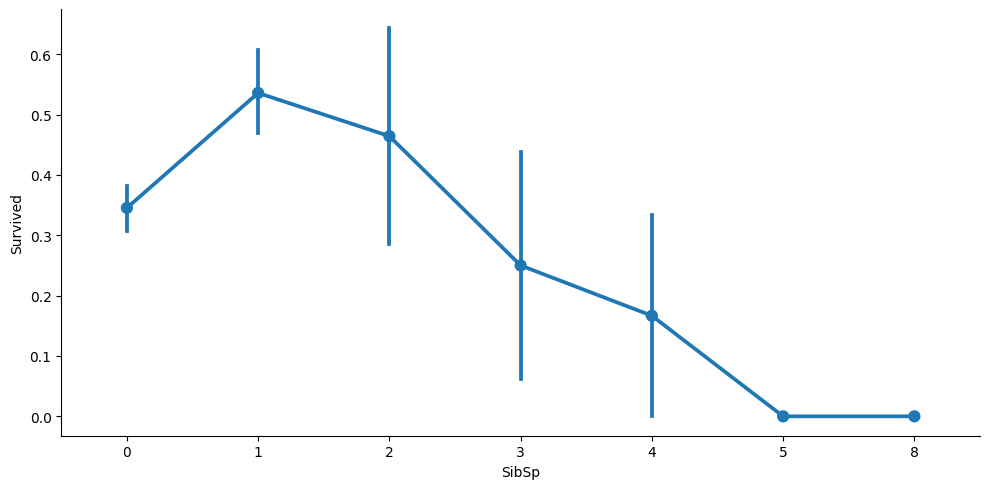

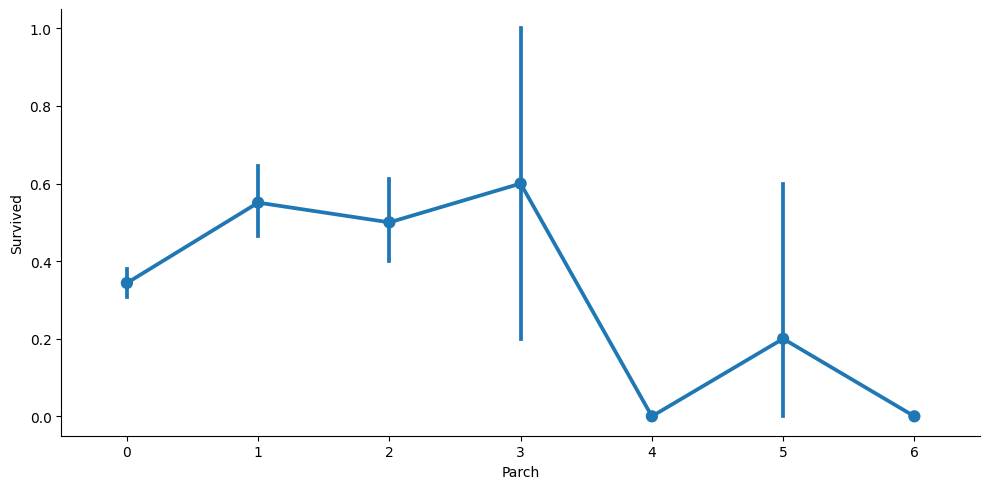

In [11]:
for i , col in enumerate(["Pclass" , "SibSp" , "Parch"]):
    plt.figure(i)
    sns.catplot(x = col , y = "Survived" , data = titanic , kind = "point" , aspect = 2)

In [12]:
titanic["Age"].fillna(titanic["Age"].mean() , inplace = True)
titanic["Age"].isnull().sum()

0

In [13]:

titanic["Family_count"] = titanic["SibSp"] + titanic["Parch"]
titanic.drop(["SibSp" , "Parch"] , axis = 1 , inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_count
0,0,3,male,22.0,7.2500,NaN,S,1
1,1,1,female,38.0,71.2833,C85,C,1
2,1,3,female,26.0,7.9250,NaN,S,0
3,1,1,female,35.0,53.1000,C123,S,1
4,0,3,male,35.0,8.0500,NaN,S,0


In [14]:
titanic["cabin_indicator"] = np.where(titanic["Cabin"].isnull() , 0 , 1)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_count,cabin_indicator
0,0,3,male,22.0,7.2500,NaN,S,1,0
1,1,1,female,38.0,71.2833,C85,C,1,1
2,1,3,female,26.0,7.9250,NaN,S,0,0
3,1,1,female,35.0,53.1000,C123,S,1,1
4,0,3,male,35.0,8.0500,NaN,S,0,0


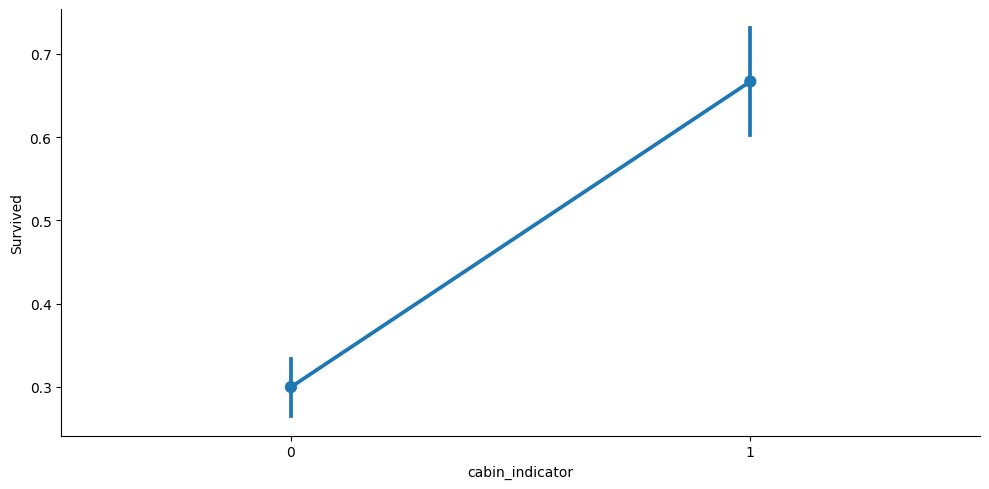

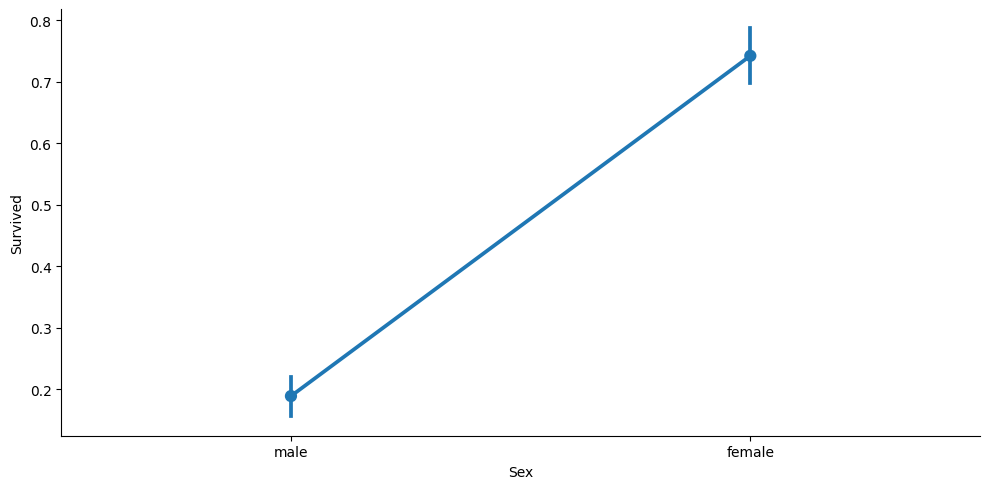

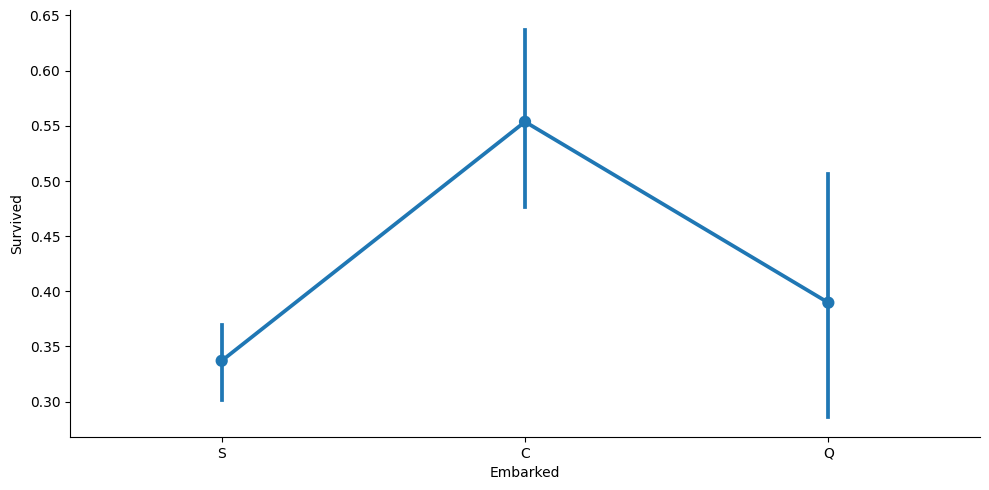

In [15]:
for i in ["cabin_indicator" , "Sex" , "Embarked"]:
    sns.catplot(x = i , y = "Survived" ,data = titanic , kind = "point" , aspect = 2)